In [73]:
import pandas as pd
import numpy as np

In [74]:
df_wine=pd.read_csv('datasets/wine.data', header=None)
df_wine.columns=['Class label', 'Alcohol',
                 'Malic acid', 'Ash',
                 'Alcalinity of ash', 'Magnesium',
                 'Total phenols', 'Flavanoids',
                 'Nonflavanoid phenols',
                 'Proanthocyanins',
                 'Color intensiyt', 'Hue',
                 'OD280/OD315 of diluted wines',
                 'Proline']

# print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensiyt,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Bringing features on the same scale

In [75]:
# Max min normalization

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [76]:
# Z score normaliztion

from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

REGULARIZATION

In [77]:
from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty='l1') # l1 - Sparse L1 regularization

LogisticRegression(penalty='l1')

In [78]:
lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear')
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 1.0
Test accuracy: 1.0


In [79]:
lr.intercept_

array([-1.26331588, -1.21602569, -2.37035816])

In [80]:
lr.coef_

array([[ 1.24565239,  0.18061089,  0.74347256, -1.16116776,  0.        ,
         0.        ,  1.17066068,  0.        ,  0.        ,  0.        ,
         0.        ,  0.54620474,  2.51056442],
       [-1.53701326, -0.38709578, -0.99531492,  0.36506292, -0.05930473,
         0.        ,  0.66830555,  0.        ,  0.        , -1.93430832,
         1.23314247,  0.        , -2.23182506],
       [ 0.13595171,  0.16834023,  0.35709136,  0.        ,  0.        ,
         0.        , -2.43854229,  0.        ,  0.        ,  1.5634978 ,
        -0.81873133, -0.49241102,  0.        ]])

In [81]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

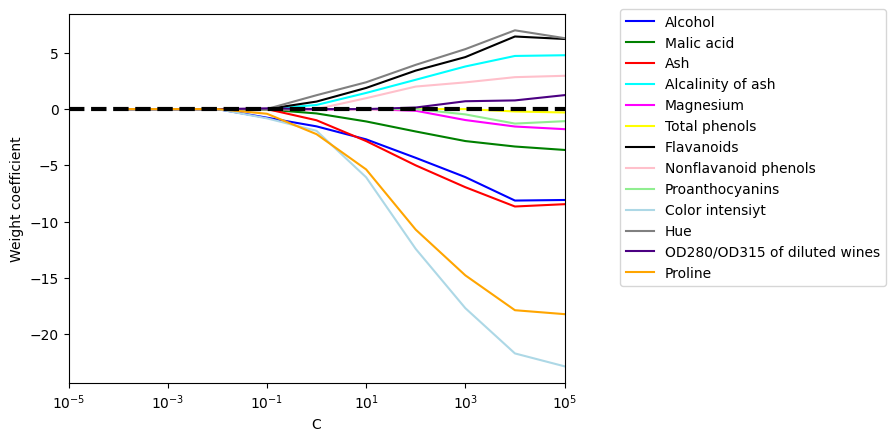

In [82]:
# to increase regularization strength , choosing the lower values of C

import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)

colors = ['blue', 'green', 'red', 'cyan',
          'magenta', 'yellow', 'black',
          'pink', 'lightgreen', 'lightblue',
          'gray', 'indigo', 'orange']

weights, params = [], []

for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1',
    C=10.**c,
    random_state=0,
    solver='liblinear')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
    label=df_wine.columns[column + 1],
    color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('Weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)